<a href="https://colab.research.google.com/github/VitorMansk/Regress-o-linear-simples/blob/main/aula_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.io.sql import DatabaseError

In [8]:
dataset = {"tempo":[1, 3, 4, 4, 6, 8, 10, 10, 11, 13],
           "vendas":[91, 110, 106, 116, 119, 129, 139, 143, 138, 159]
}

In [9]:
dataset = pd.DataFrame(dataset)
dataset.head()


,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


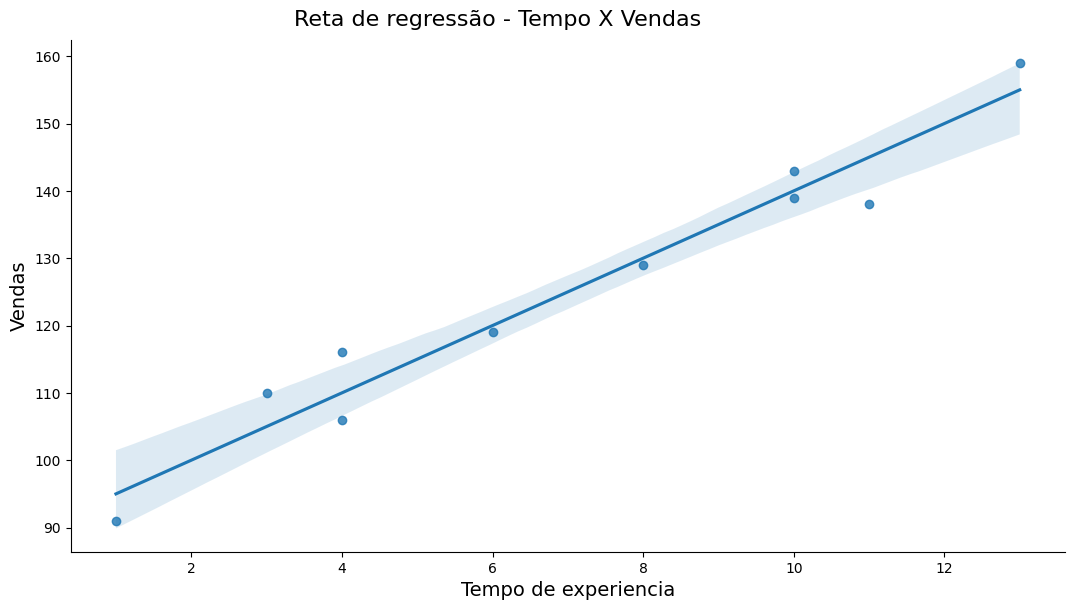

In [19]:
ax = sns.lmplot(x='tempo', y='vendas', data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de regressão - Tempo X Vendas ", fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiencia", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)

In [20]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [21]:
import statsmodels.api as sm

In [23]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo)

In [24]:
resultado_regressão = sm.OLS(Y, X).fit()

In [25]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.22e-06
Time:                        14:56:35   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
dataset["previsao"] = resultado_regressão.predict()
dataset.head()

,tempo,vendas,previsao
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [28]:
dataset['residuo'] =dataset['previsao'] - dataset['vendas']
dataset.head()

,tempo,vendas,previsao,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


#Desafio simples

In [32]:
dataset = pd.read_excel('/content/Cópia de aprovacao_alunos.xlsx')

In [33]:
dataset.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


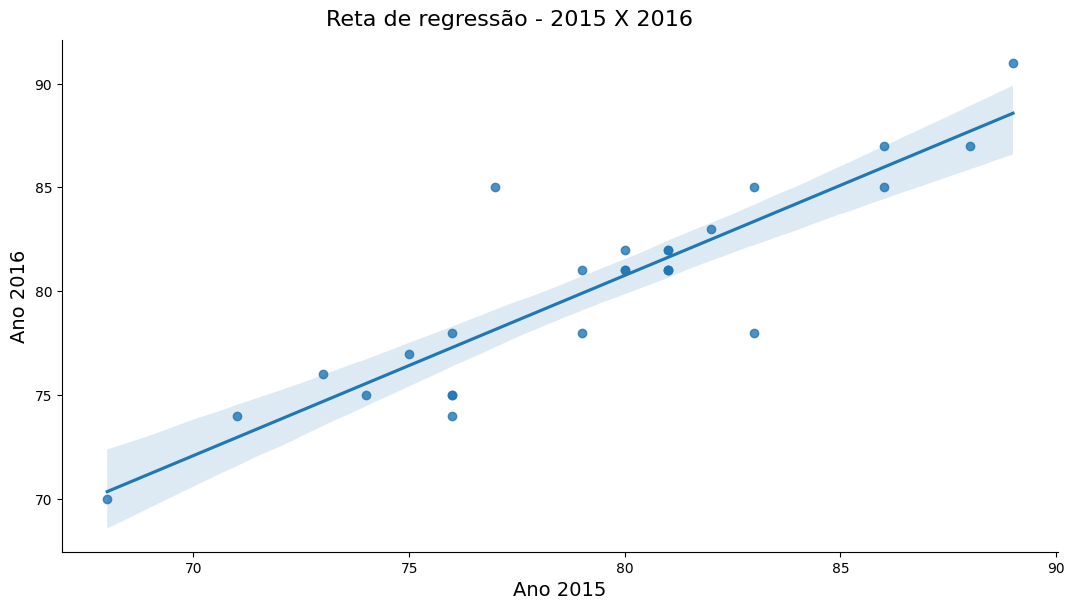

In [43]:
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de regressão - 2015 X 2016 ", fontsize=16, y=1.02)
ax.set_xlabels("Ano 2015", fontsize=14)
ax.set_ylabels("Ano 2016", fontsize=14)

In [36]:
Y = dataset.ano_2016
X = sm.add_constant(dataset.ano_2015)

In [37]:
resultado_regressão = sm.OLS(Y, X).fit()

In [38]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           3.02e-10
Time:                        15:12:28   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [39]:
dataset["previsao"] = resultado_regressão.predict()
dataset.head()

,UF,ano_2015,ano_2016,previsao
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [40]:
dataset['residuo'] =dataset['previsao'] - dataset['ano_2016']
dataset.head()

,UF,ano_2015,ano_2016,previsao,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
